# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [62]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.6.0'

#### Load Image Data

In [63]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [92]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False
model = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [93]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_17 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 516       
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


In [94]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

#### [5 points] Train Model

In [95]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

    
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size



res = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, \
          validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6
Epoch 1/100
21/21 [==============================] - 23s 1s/step - loss: 2.6881 - categorical_accuracy: 0.3252 - val_loss: 1.8198 - val_categorical_accuracy: 0.3200
Epoch 2/100
21/21 [==============================] - 18s 850ms/step - loss: 1.5739 - categorical_accuracy: 0.4563 - val_loss: 1.1744 - val_categorical_accuracy: 0.4000
Epoch 3/100
21/21 [==============================] - 19s 898ms/step - loss: 1.2263 - categorical_accuracy: 0.4903 - val_loss: 1.0389 - val_categorical_accuracy: 0.5000
Epoch 4/100
21/21 [==============================] - 20s 929ms/step - loss: 0.9773 - categorical_accuracy: 0.5728 - val_loss: 1.1407 - val_categorical_accuracy: 0.4800
Epoch 5/100
21/21 [==============================] - 19s 900ms/step - loss: 0.9824 - categorical_accuracy: 0.5825 - val_loss: 0.9396 - val_categorical_accuracy: 0.6400
Epoch 6/100
21/21 [==============================] - 20s 938ms/step - loss: 1.0138 - categorical_accuracy: 0.5340 - val_loss: 0.9927 - val_categorical_accurac

21/21 [==============================] - 24s 1s/step - loss: 0.5462 - categorical_accuracy: 0.7330 - val_loss: 0.6141 - val_categorical_accuracy: 0.7200
Epoch 51/100
21/21 [==============================] - 24s 1s/step - loss: 0.5398 - categorical_accuracy: 0.7718 - val_loss: 0.9851 - val_categorical_accuracy: 0.5800
Epoch 52/100
21/21 [==============================] - 24s 1s/step - loss: 0.5796 - categorical_accuracy: 0.7330 - val_loss: 0.7194 - val_categorical_accuracy: 0.6200
Epoch 53/100
21/21 [==============================] - 24s 1s/step - loss: 0.5569 - categorical_accuracy: 0.7573 - val_loss: 0.7085 - val_categorical_accuracy: 0.7000
Epoch 54/100
21/21 [==============================] - 23s 1s/step - loss: 0.5608 - categorical_accuracy: 0.7573 - val_loss: 0.4951 - val_categorical_accuracy: 0.7600
Epoch 55/100
21/21 [==============================] - 24s 1s/step - loss: 0.5579 - categorical_accuracy: 0.7524 - val_loss: 0.5993 - val_categorical_accuracy: 0.7200
Epoch 56/100
21/2

21/21 [==============================] - 18s 843ms/step - loss: 0.4890 - categorical_accuracy: 0.8058 - val_loss: 0.6186 - val_categorical_accuracy: 0.7400
Epoch 100/100
21/21 [==============================] - 18s 830ms/step - loss: 0.4250 - categorical_accuracy: 0.8301 - val_loss: 0.6431 - val_categorical_accuracy: 0.7000


#### [5 points] Plot Accuracy and Loss During Training

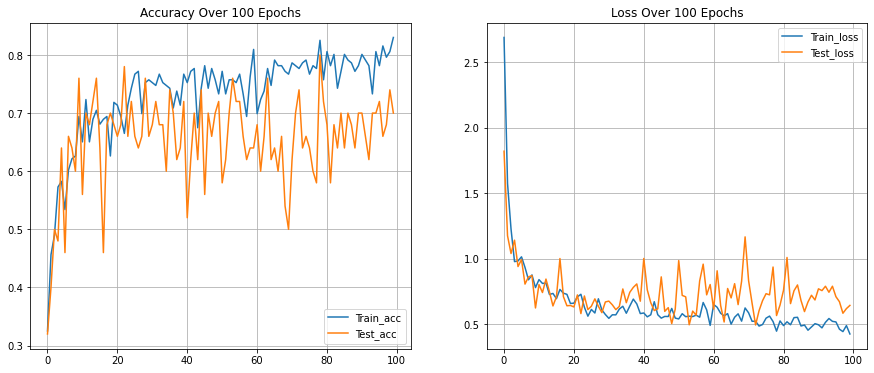

In [98]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1.plot(res.history['categorical_accuracy'])
ax1.plot(res.history['val_categorical_accuracy'])
ax1.set_title('Accuracy Over ' + str(NUM_EPOCHS) + ' Epochs')
ax1.legend(['Train_acc', 'Test_acc'], loc='lower right')
ax1.grid(True)
ax2.set_title('Loss Over ' + str(NUM_EPOCHS) + ' Epochs')
ax2.plot(res.history['loss'])
ax2.plot(res.history['val_loss'])
ax2.legend(['Train_loss', 'Test_loss'], loc='upper right')
ax2.grid(True)
plt.show()

#### Testing Model

In [99]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
 2/36 [>.............................] - ETA: 2s - loss: 5.3656 - categorical_accuracy: 0.5000     

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


36/36 [==============================] - 3s 71ms/step - loss: 0.9349 - categorical_accuracy: 0.6944
Test loss: 0.9348516464233398
Test accuracy: 0.6944444179534912


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
Extracting features for 270 images.
270/270 [==============================] - 71s 265ms/step
Training TSNE model.


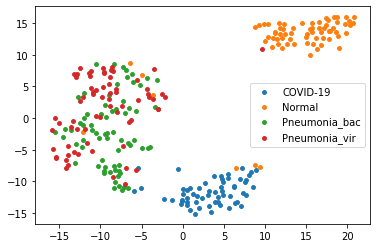

In [15]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")

raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
                          "and plot the resulting 2D features of the four classes.")

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->